# Exercício Prático - melhoria_v3 (Milene Oliveira)

Importar as principais bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importar os dados 

In [2]:
df = pd.read_csv('fire.csv')

In [3]:
df

,year,country,state,month,number,date
0,2002,Brazil,Mato Grosso,Jun,517.0,1/1/2002
1,2005,Brazil,Bahia,Aug,948.0,1/1/2005
2,2010,Brazil,Amazonas,Apr,11.0,1/1/2010
3,2014,Brazil,Maranhao,Apr,78.0,1/1/2014
4,2001,Brazil,Sergipe,Mar,1.0,1/1/2001
...,...,...,...,...,...,...
6297,2015,Brazil,Maranhao,Sep,6423.0,1/1/2015
6298,2006,Brazil,Sao Paulo,Jul,245.0,1/1/2006
6299,2012,Brazil,Acre,Sep,1996.0,1/1/2012
6300,2006,Brazil,Sao Paulo,Oct,153.0,1/1/2006


# EDA 

Exploração inicial dos dados 

In [4]:
df.columns #nomes das colunas 

Index(['year', 'country', 'state', 'month', 'number', 'date'], dtype='object')

In [5]:
print('Número total de colunas é', len(df.columns))

Número total de colunas é 6


In [6]:
df.dtypes #tipos de dados 

year         int64
country     object
state       object
month       object
number     float64
date        object
dtype: object

In [7]:
df.loc[:, "country"].unique() #identificação das variáveis únicas na coluna "country"

array(['Brazil'], dtype=object)

Verifica-se que a única variável da coluna "country" é o Brasil, pelo que concluo que a coluna é redundante 

Por observação também se verifica que a coluna "date" somente varia no ano, pelo que é redundante com a coluna "year"

In [8]:
df = df.drop(columns=['country', 'date']) #eliminação das colunas 'country' e 'date'

In [9]:
df #verificação 

,year,state,month,number
0,2002,Mato Grosso,Jun,517.0
1,2005,Bahia,Aug,948.0
2,2010,Amazonas,Apr,11.0
3,2014,Maranhao,Apr,78.0
4,2001,Sergipe,Mar,1.0
...,...,...,...,...
6297,2015,Maranhao,Sep,6423.0
6298,2006,Sao Paulo,Jul,245.0
6299,2012,Acre,Sep,1996.0
6300,2006,Sao Paulo,Oct,153.0


Fazer alguns histogramas para ver a distribuição dos dados 

In [10]:
columns = df.columns

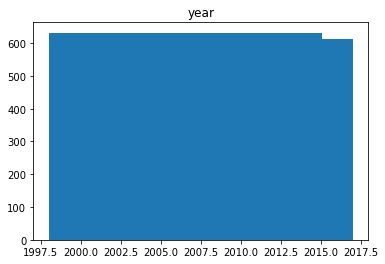

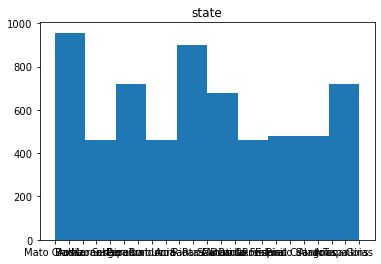

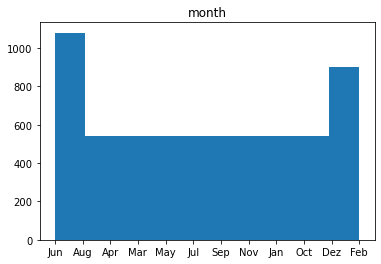

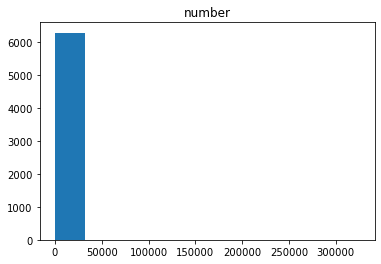

In [11]:
for col in columns:
    plt.hist(x=df[col])
    plt.title(col)
    plt.show()

In [12]:
df.describe()

,year,number
count,6302.000000,6290.000000
mean,2007.472866,584.367409
std,5.752539,4382.591434
min,1998.000000,0.000000
25%,2002.000000,8.000000
50%,2007.000000,54.000000
75%,2012.000000,278.000000
max,2017.000000,325000.000000


Consegue-se perceber que existem nulos na coluna 'number' e que o máximo da coluna 'number' parece estanhamente elevado. Próximo passo será verificar se existem nulos e se este dado é um outlier. 

In [13]:
df.isnull().sum() #verificação de nulos 

year       0
state      0
month      0
number    12
dtype: int64

Temos 12 nulos na coluna 'number'

C:\Users\PTL14736\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number', ylabel='year'>

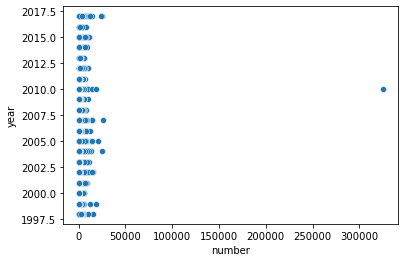

In [14]:
sns.scatterplot(df['number'], df['year']) 

In [15]:
Q3 = 278
Q1 = 8 
IQR = Q3 - Q1 
result = Q3 + (3*IQR) 
print(result)

1088


Através deste gráfico e cálculos acima conclui-se que este dado é um extreme value porque é superior a Q3+3IQR

# Substituição de nulos e Extreme Value

In [16]:
median_number = df['number'].median() #cálculo da mediana da coluna number 
print('A mediana é', median_number)

A mediana é 54.0


In [17]:
df.iloc[:,3:4] = df.iloc[:,3:4].replace(np.nan,54) #substituição dos nulos pela mediana  

In [18]:
df.isnull().sum() #verificação  

year      0
state     0
month     0
number    0
dtype: int64

In [19]:
np.where(df['number']==325000) #localização do extreme value  

(array([5322], dtype=int64),)

In [20]:
df.iloc[:,3:4] = df.iloc[:,3:4].replace(325000,54) #substituição do extreme value pela mediana

In [78]:
df.describe() #verificação 

,year,number
count,6302.000000,6302.000000
mean,2007.472866,531.795144
std,5.752539,1570.146650
min,1998.000000,0.000000
25%,2002.000000,8.000000
50%,2007.000000,54.000000
75%,2012.000000,276.750000
max,2017.000000,25963.000000


# Tratamento das variáveis 

In [21]:
df.dtypes

year        int64
state      object
month      object
number    float64
dtype: object

In [22]:
df.loc[:, 'month'].unique()

array(['Jun', 'Aug', 'Apr', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan',
       'Oct', 'Dez', 'Feb'], dtype=object)

Verifica-se que 'Dez' está mal escrito - deveria ser Dec e que é necessário encodar os dados para ao fazer gráficos ser possível ordenar por ordem cronológica. 

In [23]:
df.iloc[:,2:3] = df.iloc[:,2:3].replace('Dez','Dec') #substituição de Dez por Dec

In [24]:
df.loc[:, 'month'].unique() #verificação 

array(['Jun', 'Aug', 'Apr', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan',
       'Oct', 'Dec', 'Feb'], dtype=object)

In [25]:
month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dez':12} #criação de dicionário para relacionar Meses com números 

In [26]:
df['date'] = '1' + '-'+ df['month'] + '-' + df['year'].astype(str) #junção das colunas Ano e Mês numa só coluna

In [27]:
df #verificação 

,year,state,month,number,date
0,2002,Mato Grosso,Jun,517.0,1-Jun-2002
1,2005,Bahia,Aug,948.0,1-Aug-2005
2,2010,Amazonas,Apr,11.0,1-Apr-2010
3,2014,Maranhao,Apr,78.0,1-Apr-2014
4,2001,Sergipe,Mar,1.0,1-Mar-2001
...,...,...,...,...,...
6297,2015,Maranhao,Sep,6423.0,1-Sep-2015
6298,2006,Sao Paulo,Jul,245.0,1-Jul-2006
6299,2012,Acre,Sep,1996.0,1-Sep-2012
6300,2006,Sao Paulo,Oct,153.0,1-Oct-2006


In [28]:
df['date'] = df['date'].astype('datetime64[ns]') #alteração da coluna 'date' para tipo data 

In [29]:
df.dtypes #verificação 

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [30]:
df.set_index('date', inplace=True) ##substituição do índice pela data para ser possível ordenar por ordem cronológica 

In [31]:
df = df.sort_values(by='date', ascending = True) #ordenação da tabela por ordem cronológica 

In [32]:
df #verificação 

,year,state,month,number
date,,,,
1998-01-01,1998,Bahia,Jan,0.0
1998-01-01,1998,Goias,Jan,0.0
1998-01-01,1998,Ceara,Jan,0.0
1998-01-01,1998,Distrito Federal,Jan,0.0
1998-01-01,1998,Mato Grosso,Jan,0.0
...,...,...,...,...
2017-11-01,2017,Amapa,Nov,858.0
2017-11-01,2017,Alagoas,Nov,10.0
2017-11-01,2017,Para,Nov,9079.0


# Exercise 1 : To check minimum and maximum of ‘year’ column

In [33]:
df.describe()

,year,number
count,6302.000000,6302.000000
mean,2007.472866,531.795144
std,5.752539,1570.146650
min,1998.000000,0.000000
25%,2002.000000,8.000000
50%,2007.000000,54.000000
75%,2012.000000,276.750000
max,2017.000000,25963.000000


O mínimo é 1998 e o máximo é 2017. 

# Exercise 2 : To find out total number of fires in ‘ Acre ’ state and visualizing data based on each ‘year’

In [34]:
df_Acre = df.loc[(df['state']=='Acre')] #criação de dataframe dos incêndios em Acre 

In [35]:
df_Acre

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,Jan,0.0
1998-02-01,1998,Acre,Feb,0.0
1998-03-01,1998,Acre,Mar,0.0
1998-04-01,1998,Acre,Apr,0.0
1998-05-01,1998,Acre,May,0.0
...,...,...,...,...
2017-07-01,2017,Acre,Jul,457.0
2017-08-01,2017,Acre,Aug,1493.0
2017-09-01,2017,Acre,Sep,3429.0


In [36]:
total_number_Acre = df_Acre['number'].sum() 
print('O número total de incêndios no estado Acre é', total_number_Acre)

O número total de incêndios no estado Acre é 68345.0


In [37]:
df_Acre.groupby (['year']).sum().reset_index() #agrupar os dados por ano 

,year,number
0,1998,730.0
1,1999,333.0
2,2000,434.0
3,2001,828.0
4,2002,3491.0
5,2003,6859.0
6,2004,3160.0
7,2005,9427.0
8,2006,1456.0
9,2007,1419.0


Text(0, 0.5, 'Número de incêndios')

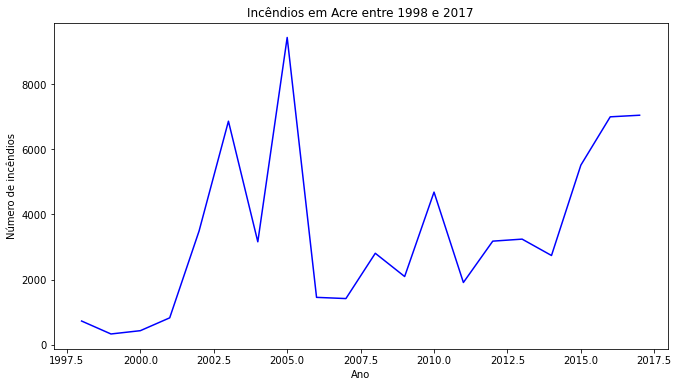

In [38]:
plt.figure(figsize =(11, 6))

a = sns.lineplot(y='number', x='year',data= df_Acre.groupby (['year']).sum().reset_index(), color='blue') #visualização dos incêndios no estado de Acre ao longo dos anos

plt.title('Incêndios em Acre entre 1998 e 2017')
plt.xlabel("Ano")
plt.ylabel("Número de incêndios")


O ano 2005 foi o ano com maior número de incêndios - 9427, por oposição ao ano de 1999 com 333 incêndios. 

# Exercise 3 : To find out total number of fires by state

In [39]:
df_state = df.groupby('state').sum().reset_index() #agrupar os dados por estado, criação de dataframe df_state

In [40]:
df_state.head()

,state,year,number
0,Acre,479783,68345.0
1,Alagoas,481800,4675.0
2,Amapa,479783,25116.0
3,Amazonas,479783,117467.0
4,Bahia,479783,226979.0


In [41]:
df_state = df_state.drop(columns=['year']) #eliminação da coluna 'year'

[Text(0, 0, '68345'),
 Text(0, 0, '4675'),
 Text(0, 0, '25116'),
 Text(0, 0, '117467'),
 Text(0, 0, '226979'),
 Text(0, 0, '80162'),
 Text(0, 0, '3561'),
 Text(0, 0, '6546'),
 Text(0, 0, '110963'),
 Text(0, 0, '375279'),
 Text(0, 0, '767890'),
 Text(0, 0, '158188'),
 Text(0, 0, '577841'),
 Text(0, 0, '65206'),
 Text(0, 0, '24498'),
 Text(0, 0, '178707'),
 Text(0, 0, '46198'),
 Text(0, 0, '183814'),
 Text(0, 0, '27077'),
 Text(0, 0, '26420'),
 Text(0, 0, '61299'),
 Text(0, 0, '2710'),
 Text(0, 0, '212432')]

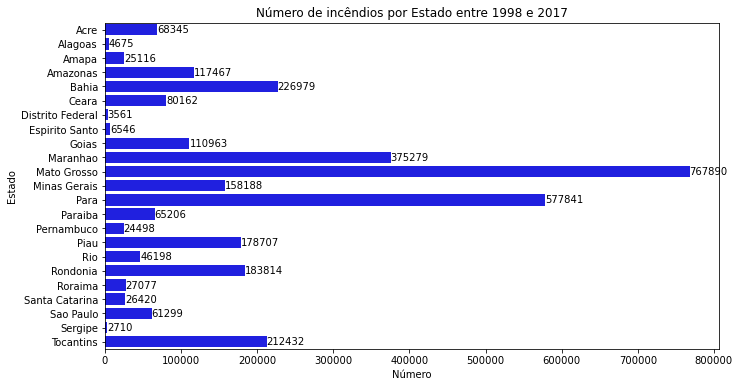

In [85]:
plt.figure(figsize =(11, 6))

b = sns.barplot(x='number', y='state',data=df_state, color='blue')

plt.title('Número de incêndios por Estado entre 1998 e 2017')
plt.xlabel("Número")
plt.ylabel("Estado")

b.bar_label(b.containers[0])

Verifica-se que Mato Grosso é o estado onde claramente houve maior número de incêndios, seguido pelo Pará e Maranhão. Por outro lado, no Distrito Federal, Alagoas e Espirito Santo houve menor número de incêndios.

# Exercise 4 :To find out total number of fires in 2010 and visualizing data based on each ‘month’

In [43]:
df_2010 = df.loc[(df['year']==2010)] #criação de dataframe do ano 2010 

In [44]:
df_2010

,year,state,month,number
date,,,,
2010-01-01,2010,Bahia,Jan,297.0
2010-01-01,2010,Sergipe,Jan,29.0
2010-01-01,2010,Mato Grosso,Jan,298.0
2010-01-01,2010,Rio,Jan,13.0
2010-01-01,2010,Rondonia,Jan,18.0
...,...,...,...,...
2010-12-01,2010,Distrito Federal,Dec,1.0
2010-12-01,2010,Acre,Dec,0.0
2010-12-01,2010,Goias,Dec,0.0


In [45]:
total_number_2010 = df_2010['number'].sum() #número total de incêndios é correspondente ao somatório dos valores registados na coluna number
print('O número total de incêndios em 2010 é igual a',total_number_2010)

O número total de incêndios em 2010 é igual a 222719.0


In [46]:
df_2010 = df_2010.groupby (['month']).sum().reset_index()  #agrupar df_2010 por mês 

[Text(0, 0, '2882'),
 Text(0, 0, '2386'),
 Text(0, 0, '2417'),
 Text(0, 0, '2200'),
 Text(0, 0, '3497'),
 Text(0, 0, '3642'),
 Text(0, 0, '16646'),
 Text(0, 0, '58985'),
 Text(0, 0, '75679'),
 Text(0, 0, '31485'),
 Text(0, 0, '16584'),
 Text(0, 0, '6316')]

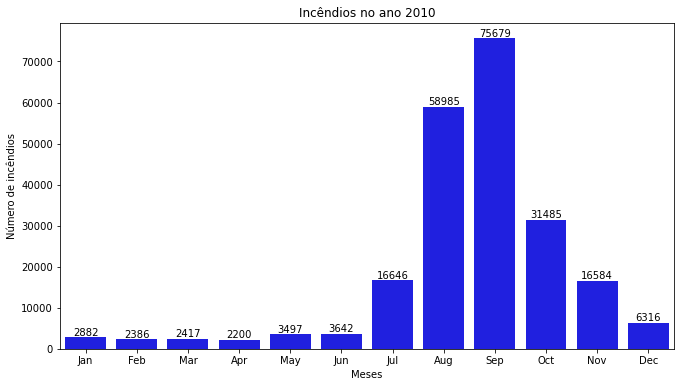

In [47]:
plt.figure(figsize =(11, 6))

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
c = sns.barplot(x='month', y='number',data=df_2010, color='blue', order=month)

plt.title('Incêndios no ano 2010')
plt.xlabel("Meses")
plt.ylabel("Número de incêndios")

c.bar_label(c.containers[0])

Consegue-se perceber pela visualização deste gráfico que no ano 2010 os meses de Agosto, Setembro e Outubro registaram maior número de incêndios. 

# Exercise 5 : To find out average number of total fires. (5.1 Only Jan)

In [48]:
df.describe()

,year,number
count,6302.000000,6302.000000
mean,2007.472866,531.795144
std,5.752539,1570.146650
min,1998.000000,0.000000
25%,2002.000000,8.000000
50%,2007.000000,54.000000
75%,2012.000000,276.750000
max,2017.000000,25963.000000


In [49]:
average = df['number'].mean()
print('A média do número total de incêndios é', average)

A média do número total de incêndios é 531.7951443986036


In [50]:
df_jan = df.loc[(df['month']=='Jan')] #criação de dataframe com ocorrências de Janeiro 

In [51]:
df_jan.describe()

,year,number
count,541.000000,541.000000
mean,2007.517560,97.247689
std,5.780728,177.242065
min,1998.000000,0.000000
25%,2003.000000,10.000000
50%,2008.000000,38.000000
75%,2013.000000,106.000000
max,2017.000000,1768.000000


In [52]:
average_jan = df_jan['number'].mean()
print('A média do número total de incêndios é', average_jan)

A média do número total de incêndios é 97.24768946395564


# Exercise 6 : To find out the state names where fires occurred in ‘ Dec’ month

In [65]:
df_dec = df.loc[(df['month']== 'Dec') & (df['number']!= 0)] #criação de dataframe com ocorrências em Dezembro diferentes de zero

In [66]:
df_dec

,year,state,month,number
date,,,,
1998-12-01,1998,Alagoas,Dec,32.0
1998-12-01,1998,Acre,Dec,7.0
1998-12-01,1998,Maranhao,Dec,1399.0
1998-12-01,1998,Espirito Santo,Dec,5.0
1998-12-01,1998,Piau,Dec,119.0
...,...,...,...,...
2016-12-01,2016,Mato Grosso,Dec,123.0
2016-12-01,2016,Acre,Dec,6.0
2016-12-01,2016,Amazonas,Dec,133.0


In [67]:
states = df_dec['state'].unique() 
print('Os estados onde ocorreram incêndios em Dezembro são', states)

Os estados onde ocorreram incêndios em Dezembro são ['Alagoas' 'Acre' 'Maranhao' 'Espirito Santo' 'Piau' 'Ceara' 'Paraiba'
 'Tocantins' 'Amapa' 'Amazonas' 'Mato Grosso' 'Pernambuco' 'Bahia'
 'Minas Gerais' 'Para' 'Distrito Federal']


[Text(0, 0, '44244'),
 Text(0, 0, '30615'),
 Text(0, 0, '21193'),
 Text(0, 0, '13362'),
 Text(0, 0, '7030'),
 Text(0, 0, '5966'),
 Text(0, 0, '4504'),
 Text(0, 0, '4222'),
 Text(0, 0, '3340'),
 Text(0, 0, '2224'),
 Text(0, 0, '1998'),
 Text(0, 0, '1549'),
 Text(0, 0, '964'),
 Text(0, 0, '239'),
 Text(0, 0, '47'),
 Text(0, 0, '5')]

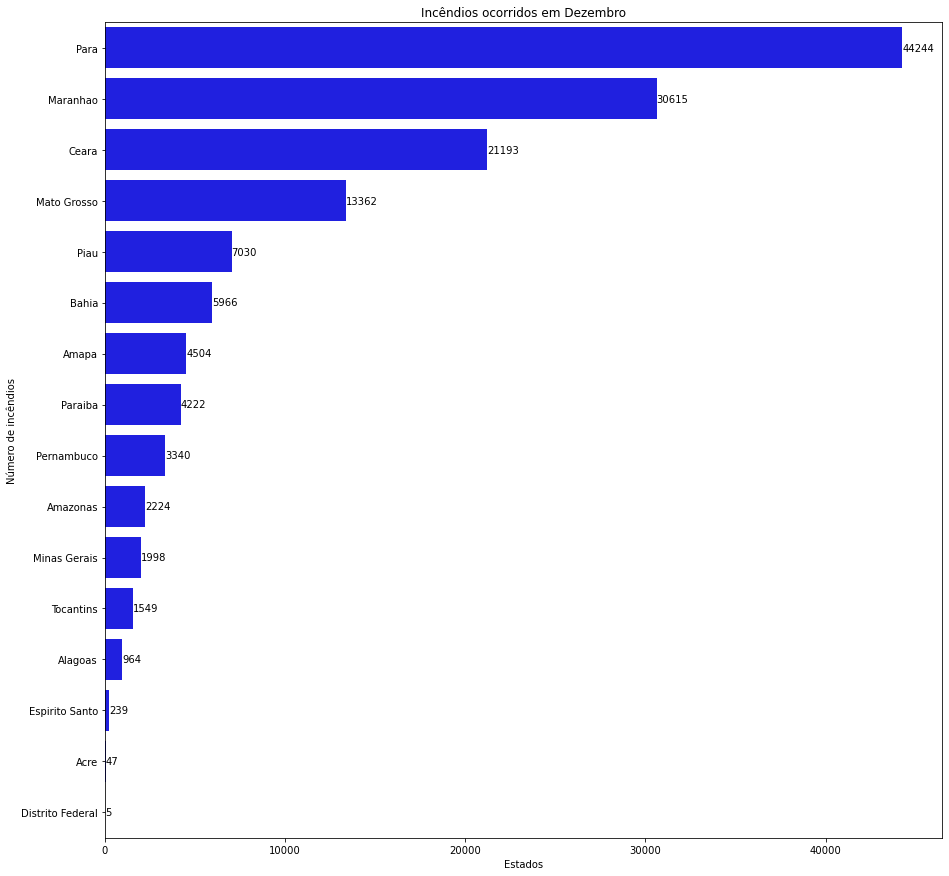

In [84]:
plt.figure(figsize =(15, 15))

d = sns.barplot(x='number', y='state',data = df_dec.groupby('state').sum().reset_index().sort_values(by='number', ascending = False), color='blue')

plt.title('Incêndios ocorridos em Dezembro')
plt.xlabel("Estados")
plt.ylabel("Número de incêndios")

d.bar_label(d.containers[0])

Pelo gráfico percebemos que no mês de Dezembro, os estados com maior número de incêndios são o Pará, Maranhão e Ceara. 

# Visualização do número total de incêndios por mês 

In [86]:
df_month = df.groupby (['month']).sum().reset_index()  #agrupar dados por mês 

[Text(0, 0, '52611'),
 Text(0, 0, '30895'),
 Text(0, 0, '35105'),
 Text(0, 0, '28352'),
 Text(0, 0, '45986'),
 Text(0, 0, '111155'),
 Text(0, 0, '216873'),
 Text(0, 0, '738153'),
 Text(0, 0, '1.01e+06'),
 Text(0, 0, '628513'),
 Text(0, 0, '312227'),
 Text(0, 0, '141502')]

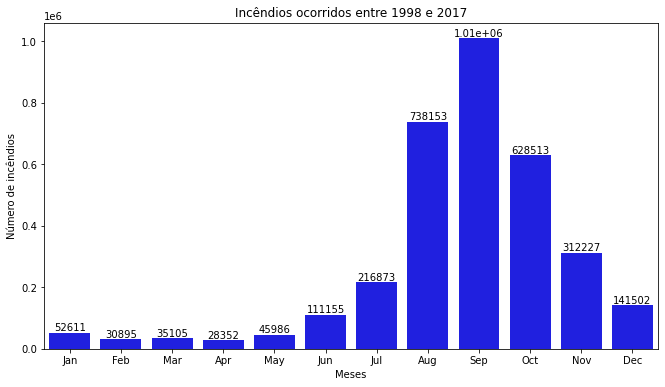

In [87]:
plt.figure(figsize =(11, 6))

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
e = sns.barplot(x='month', y='number',data=df_month, color='blue', order=month)

plt.title('Incêndios ocorridos entre 1998 e 2017')
plt.xlabel("Meses")
plt.ylabel("Número de incêndios")

e.bar_label(e.containers[0])

Verifica-se que os incêndios ocorrem em maior número em 3 meses seguidos do ano - Agosto, Setembro e Outubro, estranhamente no Inverno que começa em Junho e termina em Setembro e ainda o primeiro mês da Primavera. 

# Extra: From an EDA perspective what analysis would you add?

Feito ao longo do exercício:
a) eliminação de nulos através da sua substituição pela mediana
b) eliminação de outlier através da sua substituição pela mediana 
c) transformação de dados para criar uma coluna datatipe por forma a conseguir ordenar por data  
d) remoção de colunas redundantes para o objetivo da questão
e) acrescentei a análise dos incêndios por mês para nos dar uma ideia de quando ocorrem mais incêndios no Brasil ao longo do ano. Estranhamente é na estação mais fria do ano. 